## 📊 Linear Models and Regularization

In this notebook, we explore three fundamental linear regression techniques:

- **Linear Regression** (no regularization)
- **Lasso Regression (L1)** – which can eliminate irrelevant features
- **Ridge Regression (L2)** – which shrinks coefficients to reduce overfitting

The dataset contains Facebook post data from a cosmetics brand. Our objective is to predict the number of interactions (`Total Interactions`) based on post-level features. Before fitting any model, we standardize the input features using `StandardScaler`.

We compare models by:

- Inspecting their **R² scores**
- Visualizing and analyzing **feature coefficients**
- Understanding how each regularization technique impacts the model's complexity and interpretability

🔍 LinearRegression R² Score: 0.9251
🔍 Lasso R² Score: 0.9255
🔍 Ridge R² Score: 0.9424


/var/folders/88/y8mvb5pd0hg61ljsjz2263y80000gn/T/ipykernel_97828/3071254671.py:48: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


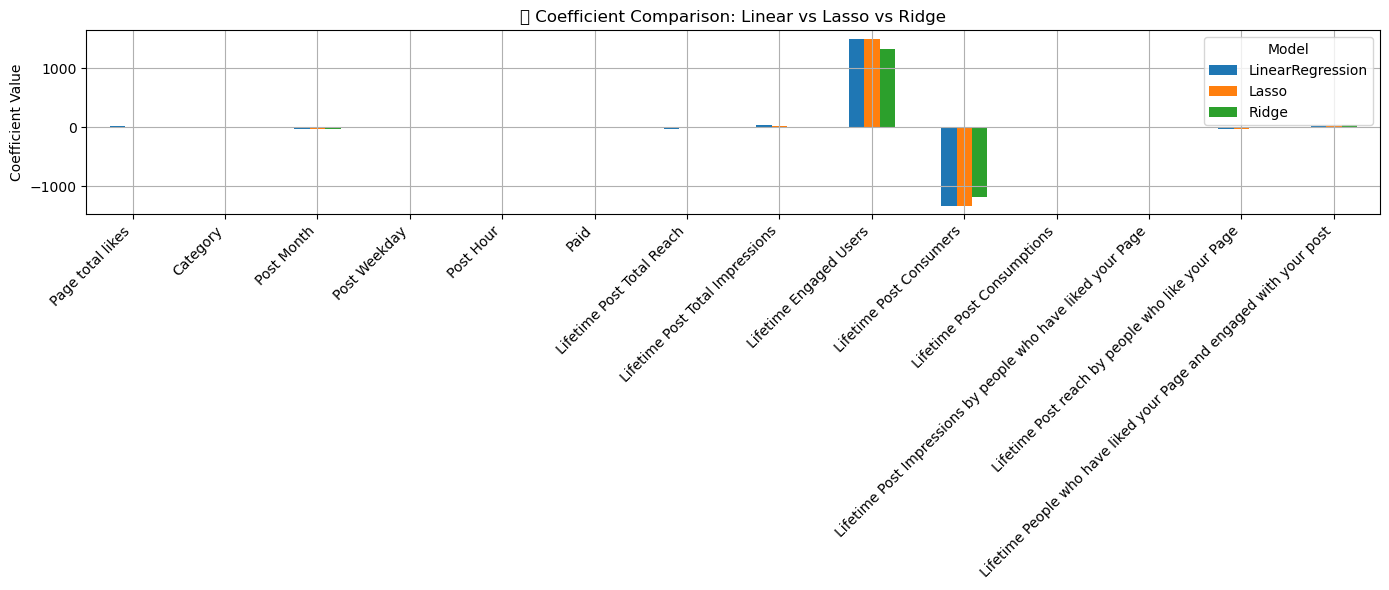

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Cargar el dataset (ajusta esta ruta si es necesario)
df = pd.read_csv('datasets/dataset_facebook_cosmetics_us.csv', sep=';')

# 1. Separar características y variable objetivo
X = df.drop('Total Interactions', axis=1)
y = df['Total Interactions']

# 2. Dividir en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# 3. Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 4. Inicializar modelos
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(alpha=0.1),
    'Ridge': Ridge(alpha=1.0)
}

# 5. Entrenar, predecir, evaluar y guardar coeficientes
coef_df = pd.DataFrame(index=X.columns)

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    r2 = r2_score(y_val, y_pred)
    print(f"🔍 {name} R² Score: {r2:.4f}")
    coef_df[name] = model.coef_

# 6. Graficar los coeficientes
plt.figure(figsize=(12, 6))
coef_df.plot(kind='bar', figsize=(14, 6))
plt.title('🔢 Coefficient Comparison: Linear vs Lasso vs Ridge')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.legend(title="Model")
plt.show()

## ✅ Conclusions

- **Linear Regression** achieved solid performance but was more sensitive to feature scale and multicollinearity.
- **Lasso Regression (L1)** automatically eliminated some features by setting their coefficients to zero, helping with interpretability and dimensionality reduction.
- **Ridge Regression (L2)** distributed the importance more evenly across features, reducing overfitting without eliminating variables.

### 🧠 Key Takeaways

- Standardizing features is essential before applying linear models, especially with regularization.
- Lasso is ideal when you want to **simplify** the model by removing redundant features.
- Ridge is preferable when you want to **retain all features** but prevent overfitting.
- Comparing coefficients visually helps interpret how each model perceives feature importance.

📌 **Regularization is not just about better accuracy — it's about building models you can trust and explain.**